**Data Analysis**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/car_evaluation.csv')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['unacc'] = le.fit_transform(df['unacc'])
df.head(100)

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,2
1,vhigh,vhigh,2,2,small,high,2
2,vhigh,vhigh,2,2,med,low,2
3,vhigh,vhigh,2,2,med,med,2
4,vhigh,vhigh,2,2,med,high,2
...,...,...,...,...,...,...,...
95,vhigh,vhigh,5more,4,big,low,2
96,vhigh,vhigh,5more,4,big,med,2
97,vhigh,vhigh,5more,4,big,high,2
98,vhigh,vhigh,5more,more,small,low,2


In [5]:
# Encode categorical features
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

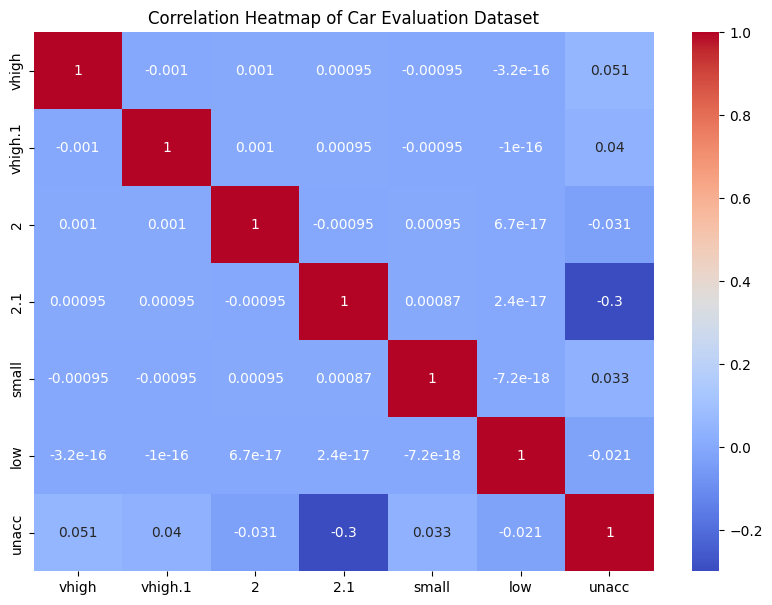

In [6]:
# Visualizations
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Car Evaluation Dataset')
plt.show()

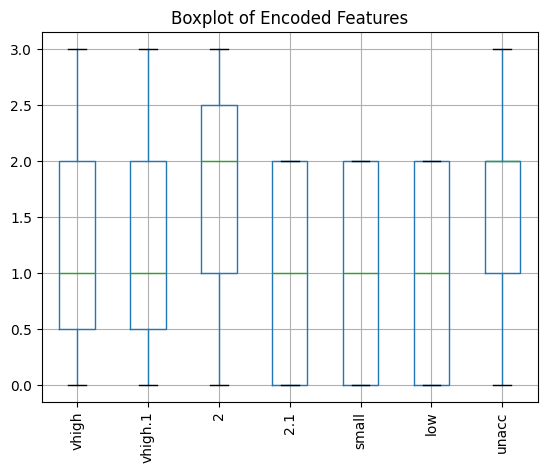

In [7]:
df.boxplot(rot=90)
plt.title('Boxplot of Encoded Features')
plt.show()

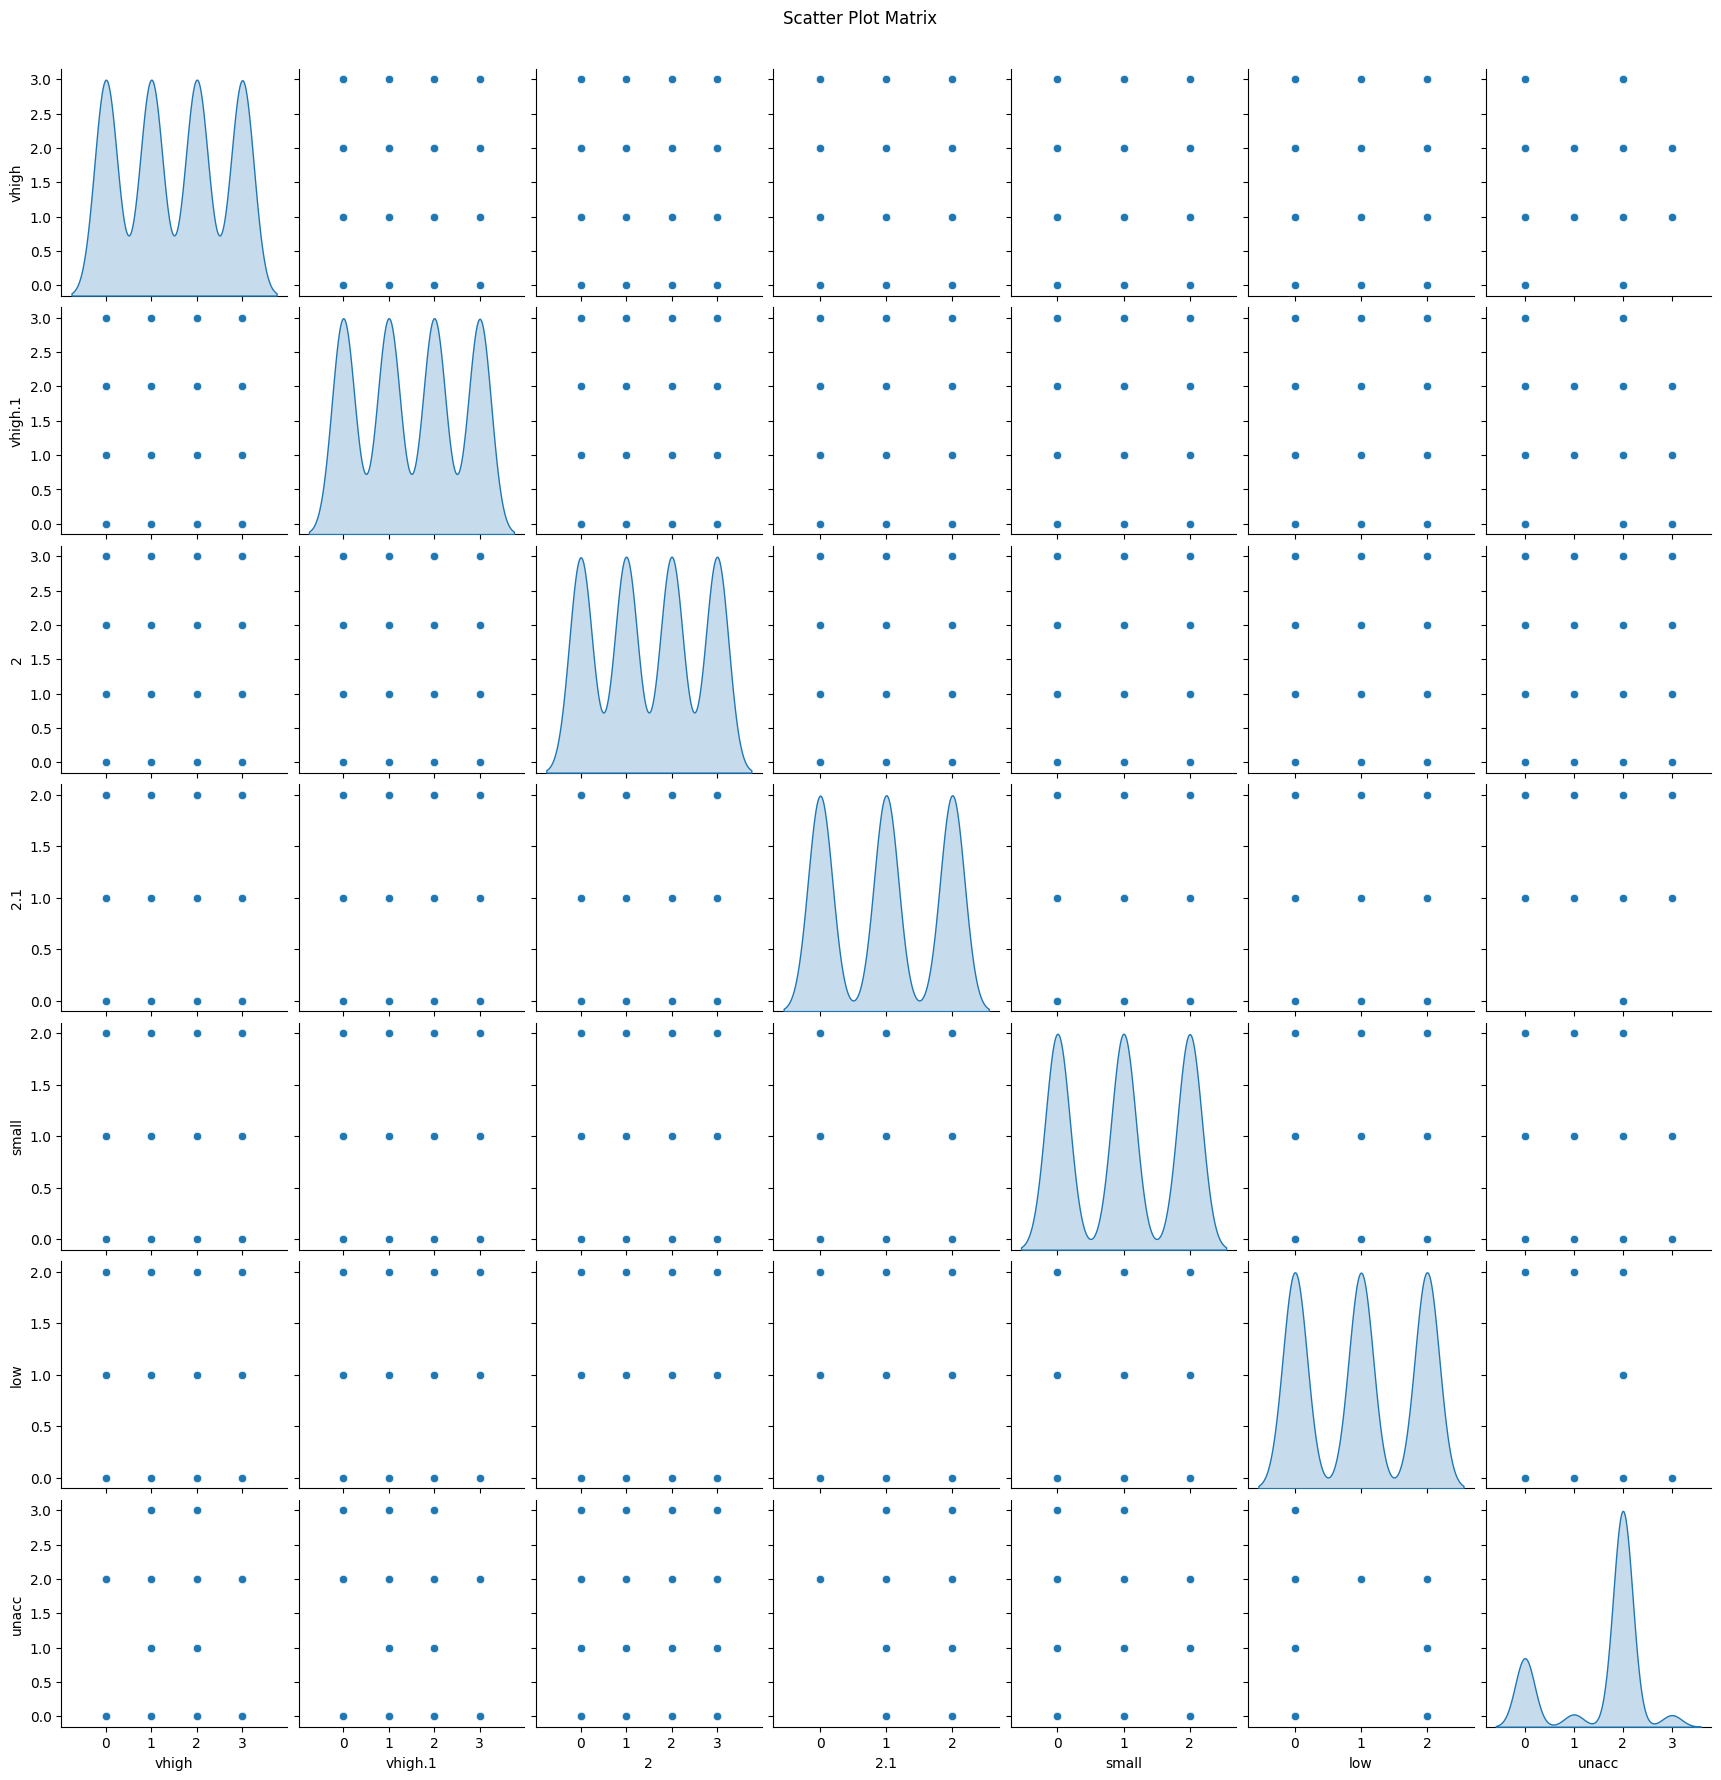

In [8]:
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()

**Algorithm Implementation: Decision Tree Implementation**

In [9]:
# Features and target
X = df.drop(columns=['unacc'])
y = df['unacc']

In [10]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
#Decision Tree
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [12]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
print("Decision Tree Results")
print(classification_report(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))
print('Decision Tree Accuracy:', accuracy_score(y_test, dt_pred))

Decision Tree Results
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       105
           1       0.76      0.81      0.79        16
           2       1.00      1.00      1.00       290
           3       0.90      0.86      0.88        21

    accuracy                           0.98       432
   macro avg       0.91      0.91      0.91       432
weighted avg       0.98      0.98      0.98       432

[[102   2   0   1]
 [  2  13   0   1]
 [  0   0 290   0]
 [  1   2   0  18]]
Decision Tree Accuracy: 0.9791666666666666


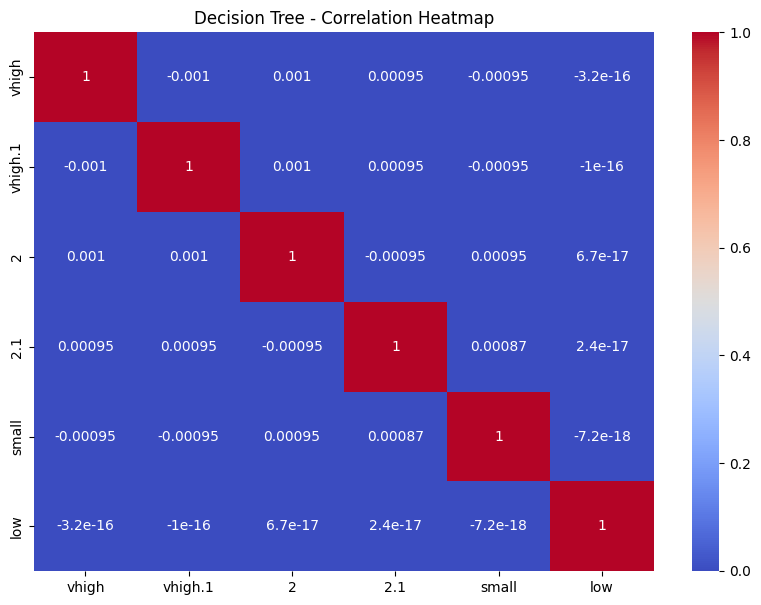

In [14]:
# Visualizations specific to Decision Tree
plt.figure(figsize=(10, 7))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Decision Tree - Correlation Heatmap')
plt.show()

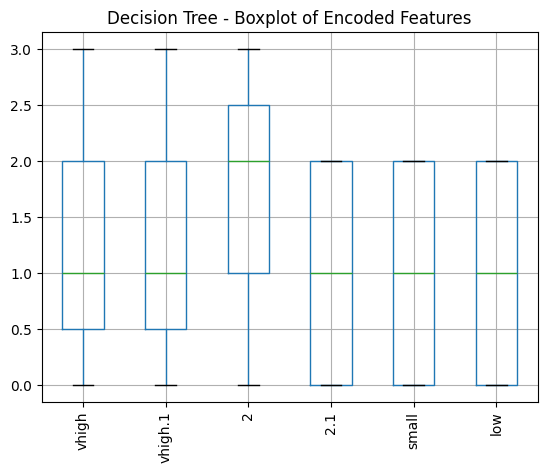

In [15]:
X.boxplot(rot=90)
plt.title('Decision Tree - Boxplot of Encoded Features')
plt.show()

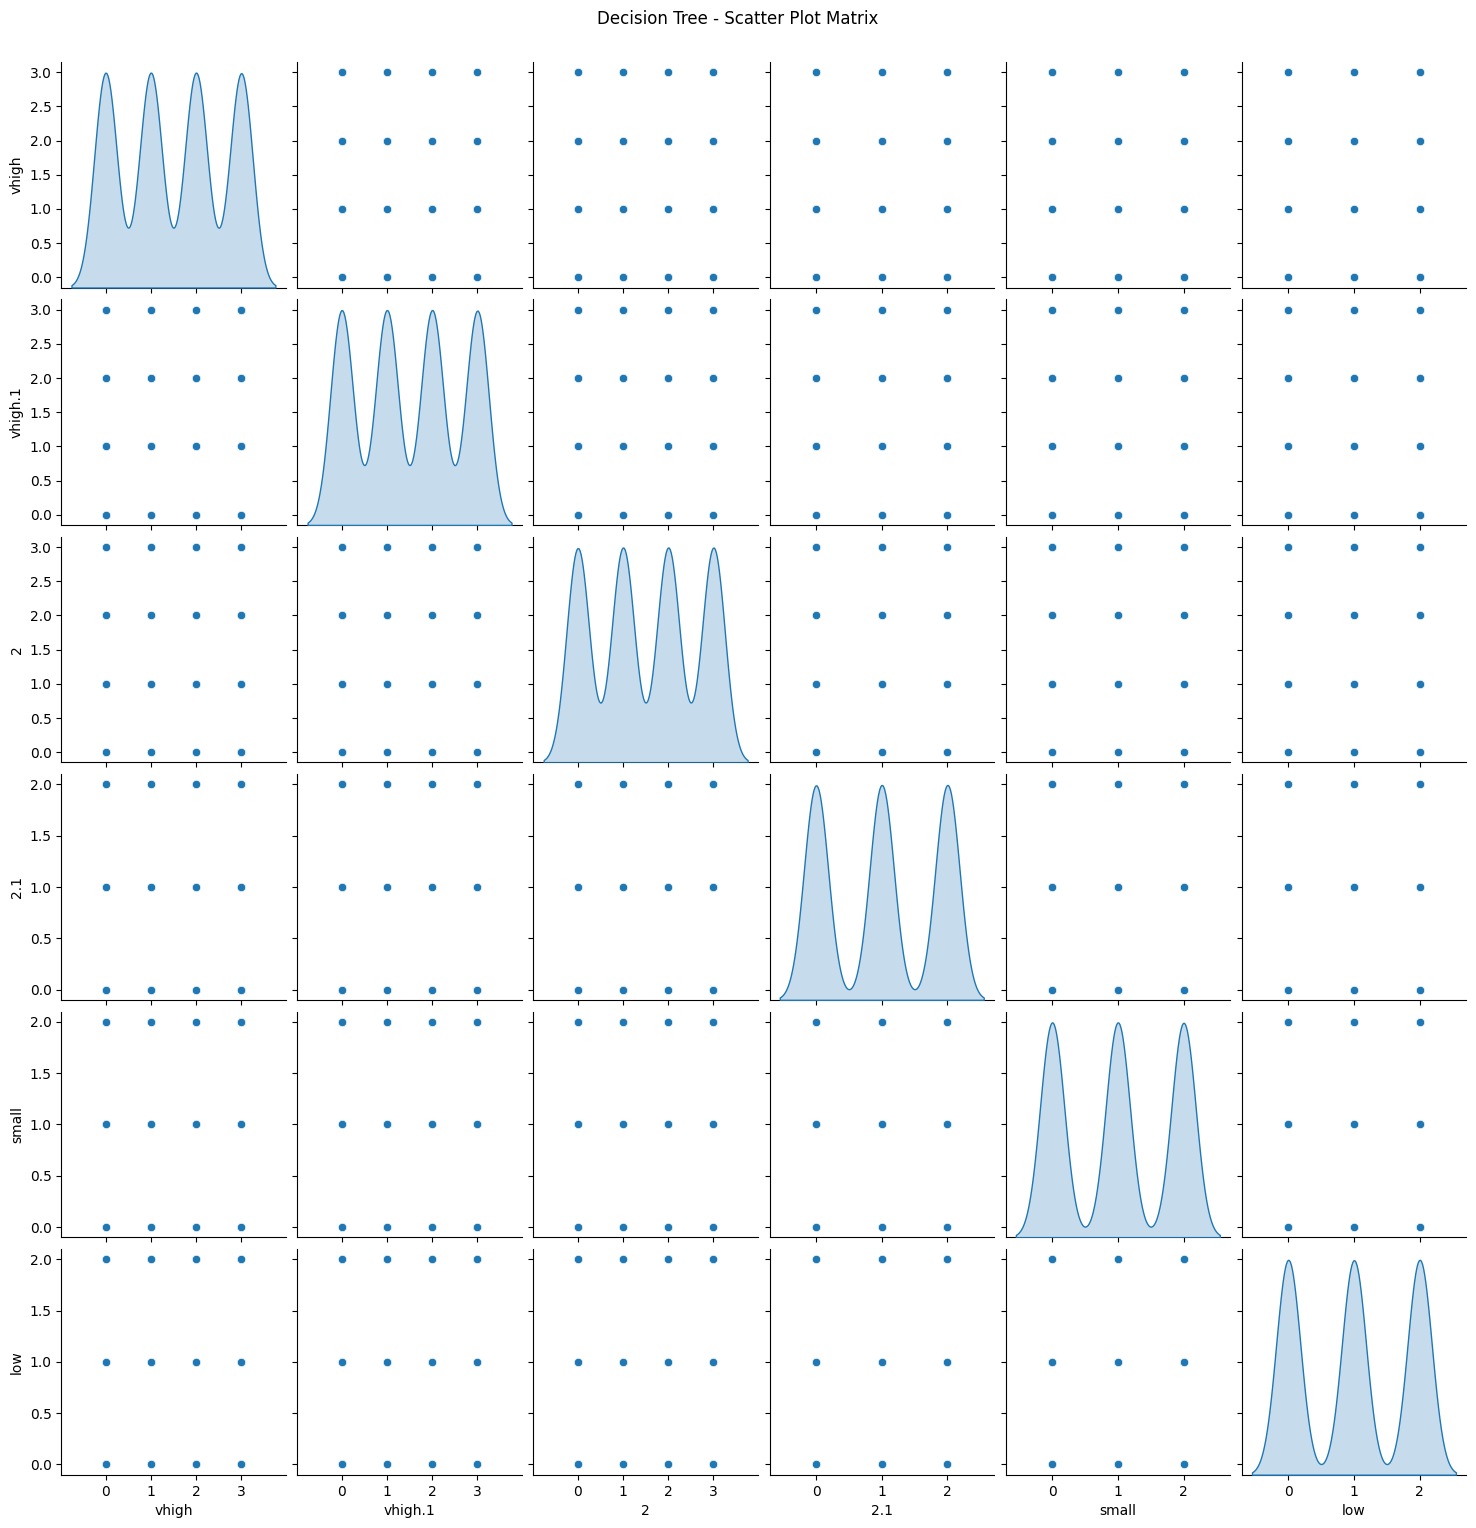

In [16]:
sns.pairplot(df.drop(columns=['unacc']), diag_kind='kde')
plt.suptitle('Decision Tree - Scatter Plot Matrix', y=1.02)
plt.show()

In [17]:
# Load the dataset
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

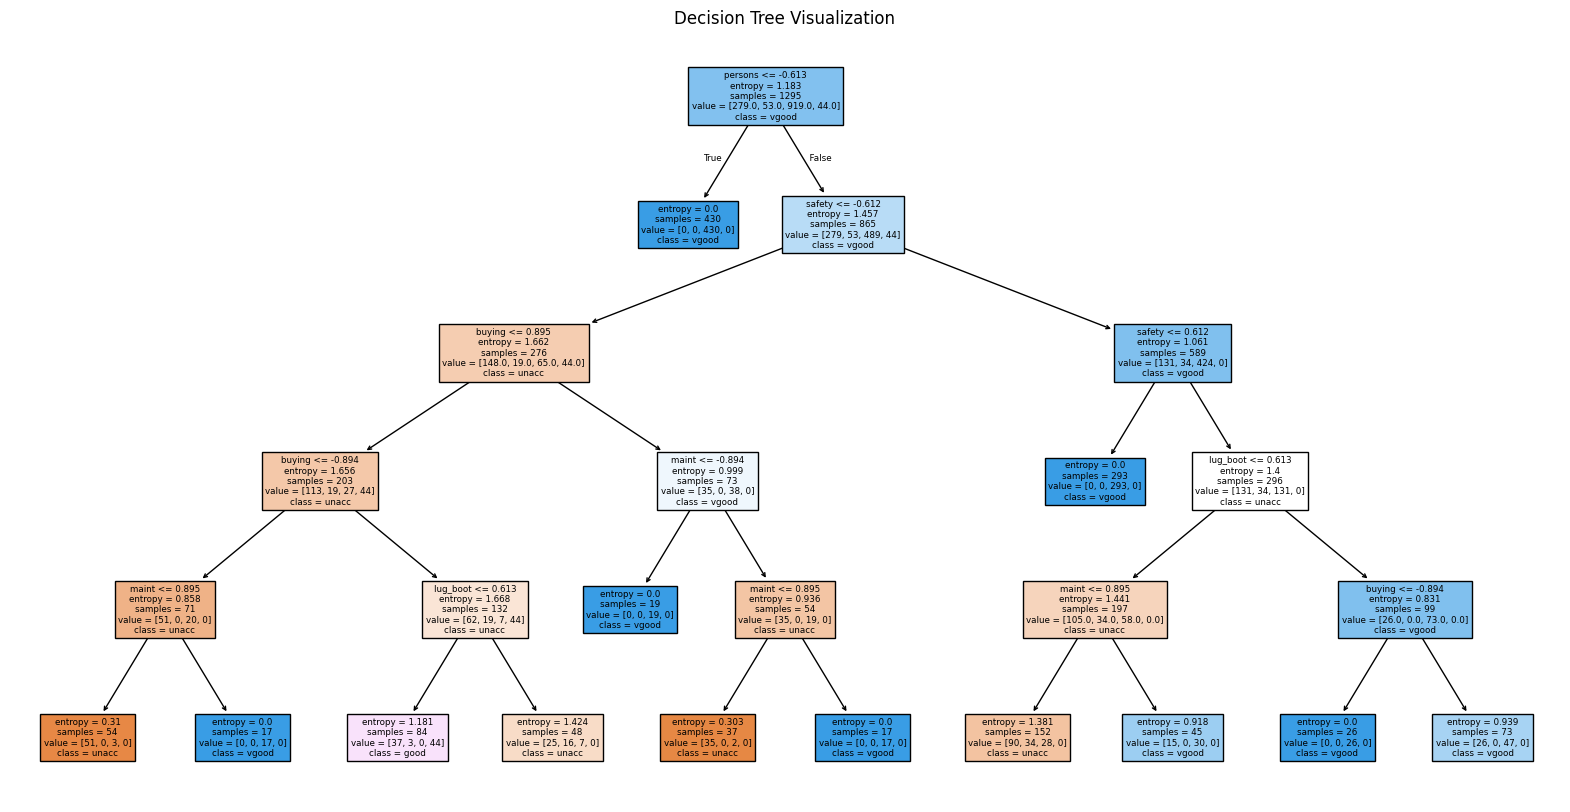

In [18]:
# Decision Tree Visualizations
df = pd.read_csv('/content/drive/MyDrive/car_evaluation.csv')
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
dt.fit(X_train, y_train)

from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=columns[:-1], class_names=df['unacc'].unique(), filled=True)
plt.title('Decision Tree Visualization')
plt.show()

**Dataset Exploration**

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [20]:
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nValue counts for each feature:")
for col in df.columns:
    print(f"\n{col}:")
    print(df[col].value_counts())

Dataset shape: (1727, 7)

First 5 rows:
   vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc

Value counts for each feature:

vhigh:
vhigh
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64

vhigh.1:
vhigh.1
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64

2:
2
3        432
4        432
5more    432
2        431
Name: count, dtype: int64

2.1:
2.1
4       576
more    576
2       575
Name: count, dtype: int64

small:
small
med      576
big      576
small    575
Name: count, dtype: int64

low:
low
med     576
high    576
low     575
Name: count, dtype: int64

unacc:
unacc
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [21]:
# Visualizations
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

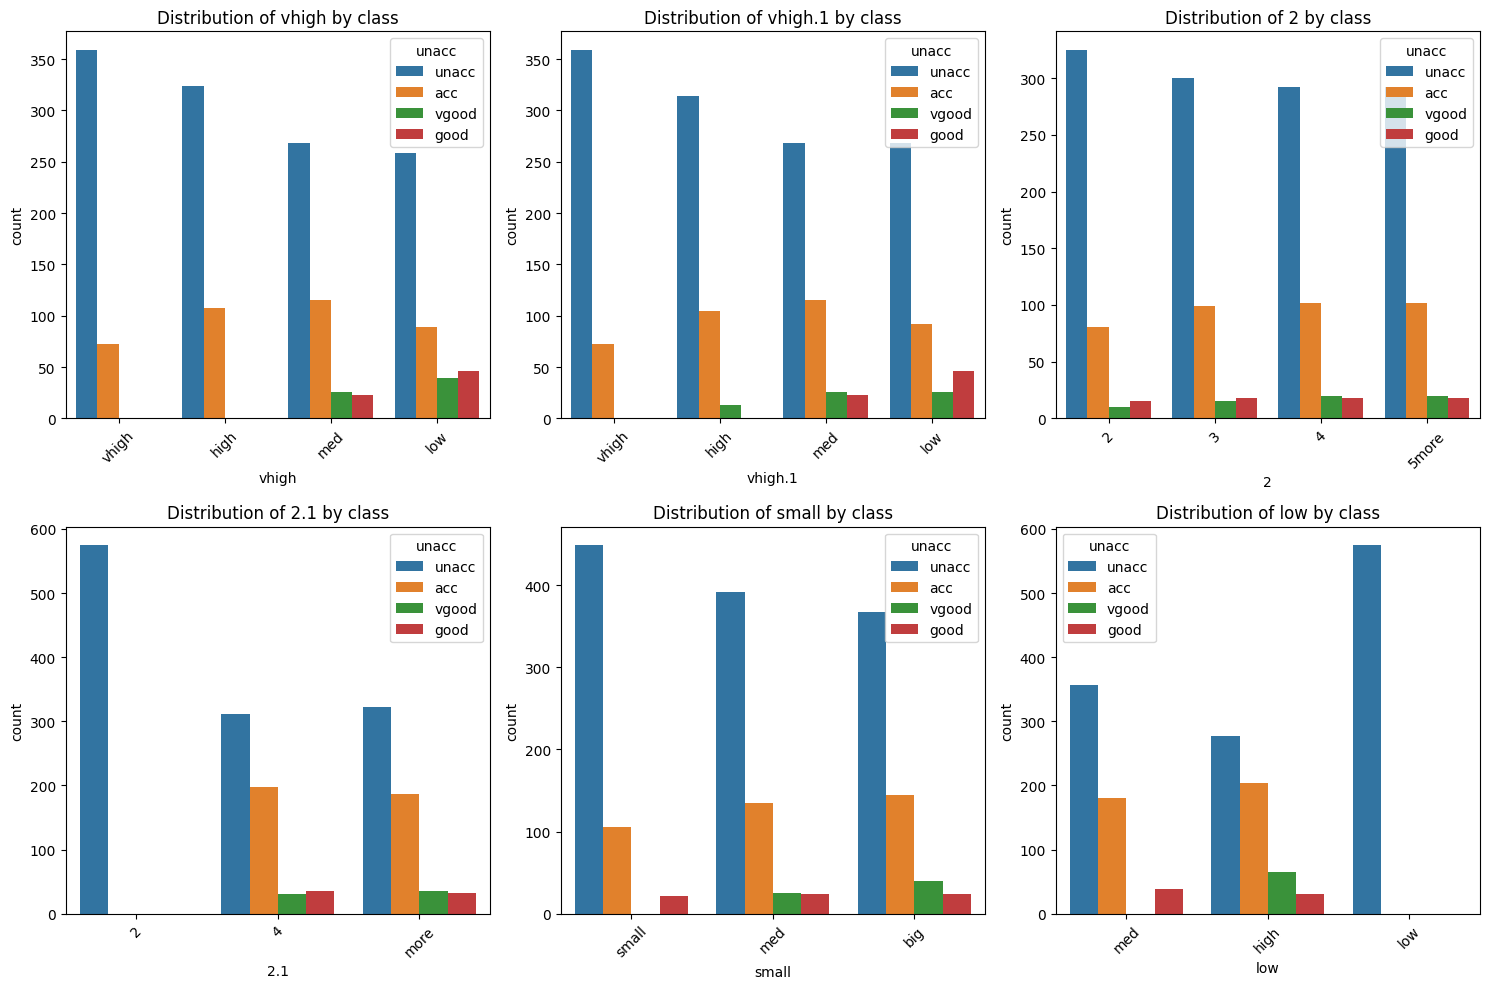

In [22]:
# Bar plots for each feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df, x=col, hue='unacc')
    plt.title(f'Distribution of {col} by class')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

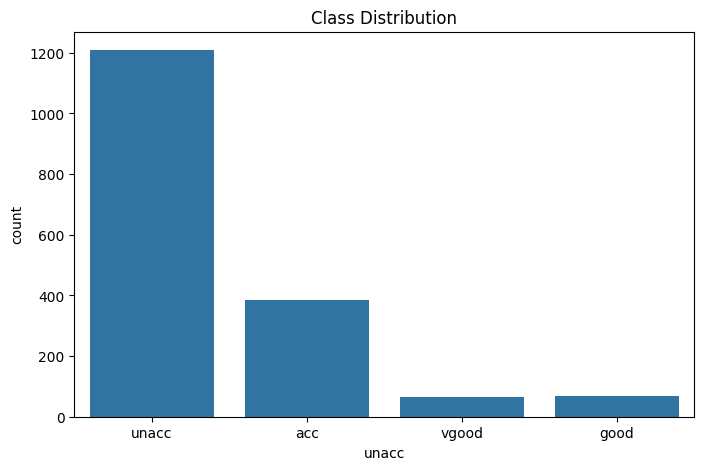

In [23]:
# Class distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='unacc')
plt.title('Class Distribution')
plt.show()

**K-Nearest Neighbors**

In [24]:
# Correlation heatmap (after encoding)
encoded_df = df.copy()
le = LabelEncoder()
for col in encoded_df.columns:
    encoded_df[col] = le.fit_transform(encoded_df[col])

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [26]:
# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test)

In [27]:
# Evaluation
print("K-Nearest Neighbors Results")
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print('KNN Accuracy:', accuracy_score(y_test, y_pred_knn))

K-Nearest Neighbors Results
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.67      0.12      0.21        16
           2       0.95      0.99      0.97       290
           3       1.00      0.67      0.80        21

    accuracy                           0.91       432
   macro avg       0.85      0.66      0.70       432
weighted avg       0.91      0.91      0.90       432

[[ 92   1  12   0]
 [ 12   2   2   0]
 [  4   0 286   0]
 [  7   0   0  14]]
KNN Accuracy: 0.9120370370370371


Text(0.5, 1.0, 'KNN - Correlation Heatmap (Scaled)')

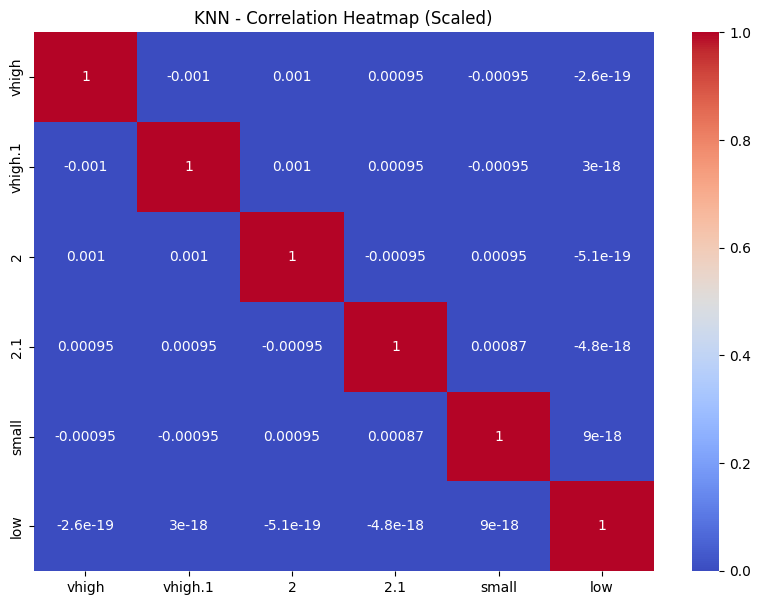

In [28]:
# Visualizations specific to K-Nearest Neighbors
plt.figure(figsize=(10, 7))
sns.heatmap(pd.DataFrame(X_scaled, columns=X.columns).corr(), annot=True, cmap='coolwarm')
plt.title('KNN - Correlation Heatmap (Scaled)')

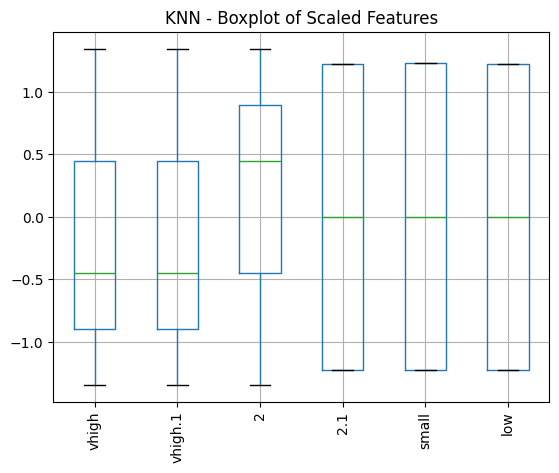

In [29]:
pd.DataFrame(X_scaled, columns=X.columns).boxplot(rot=90)
plt.title('KNN - Boxplot of Scaled Features')
plt.show()

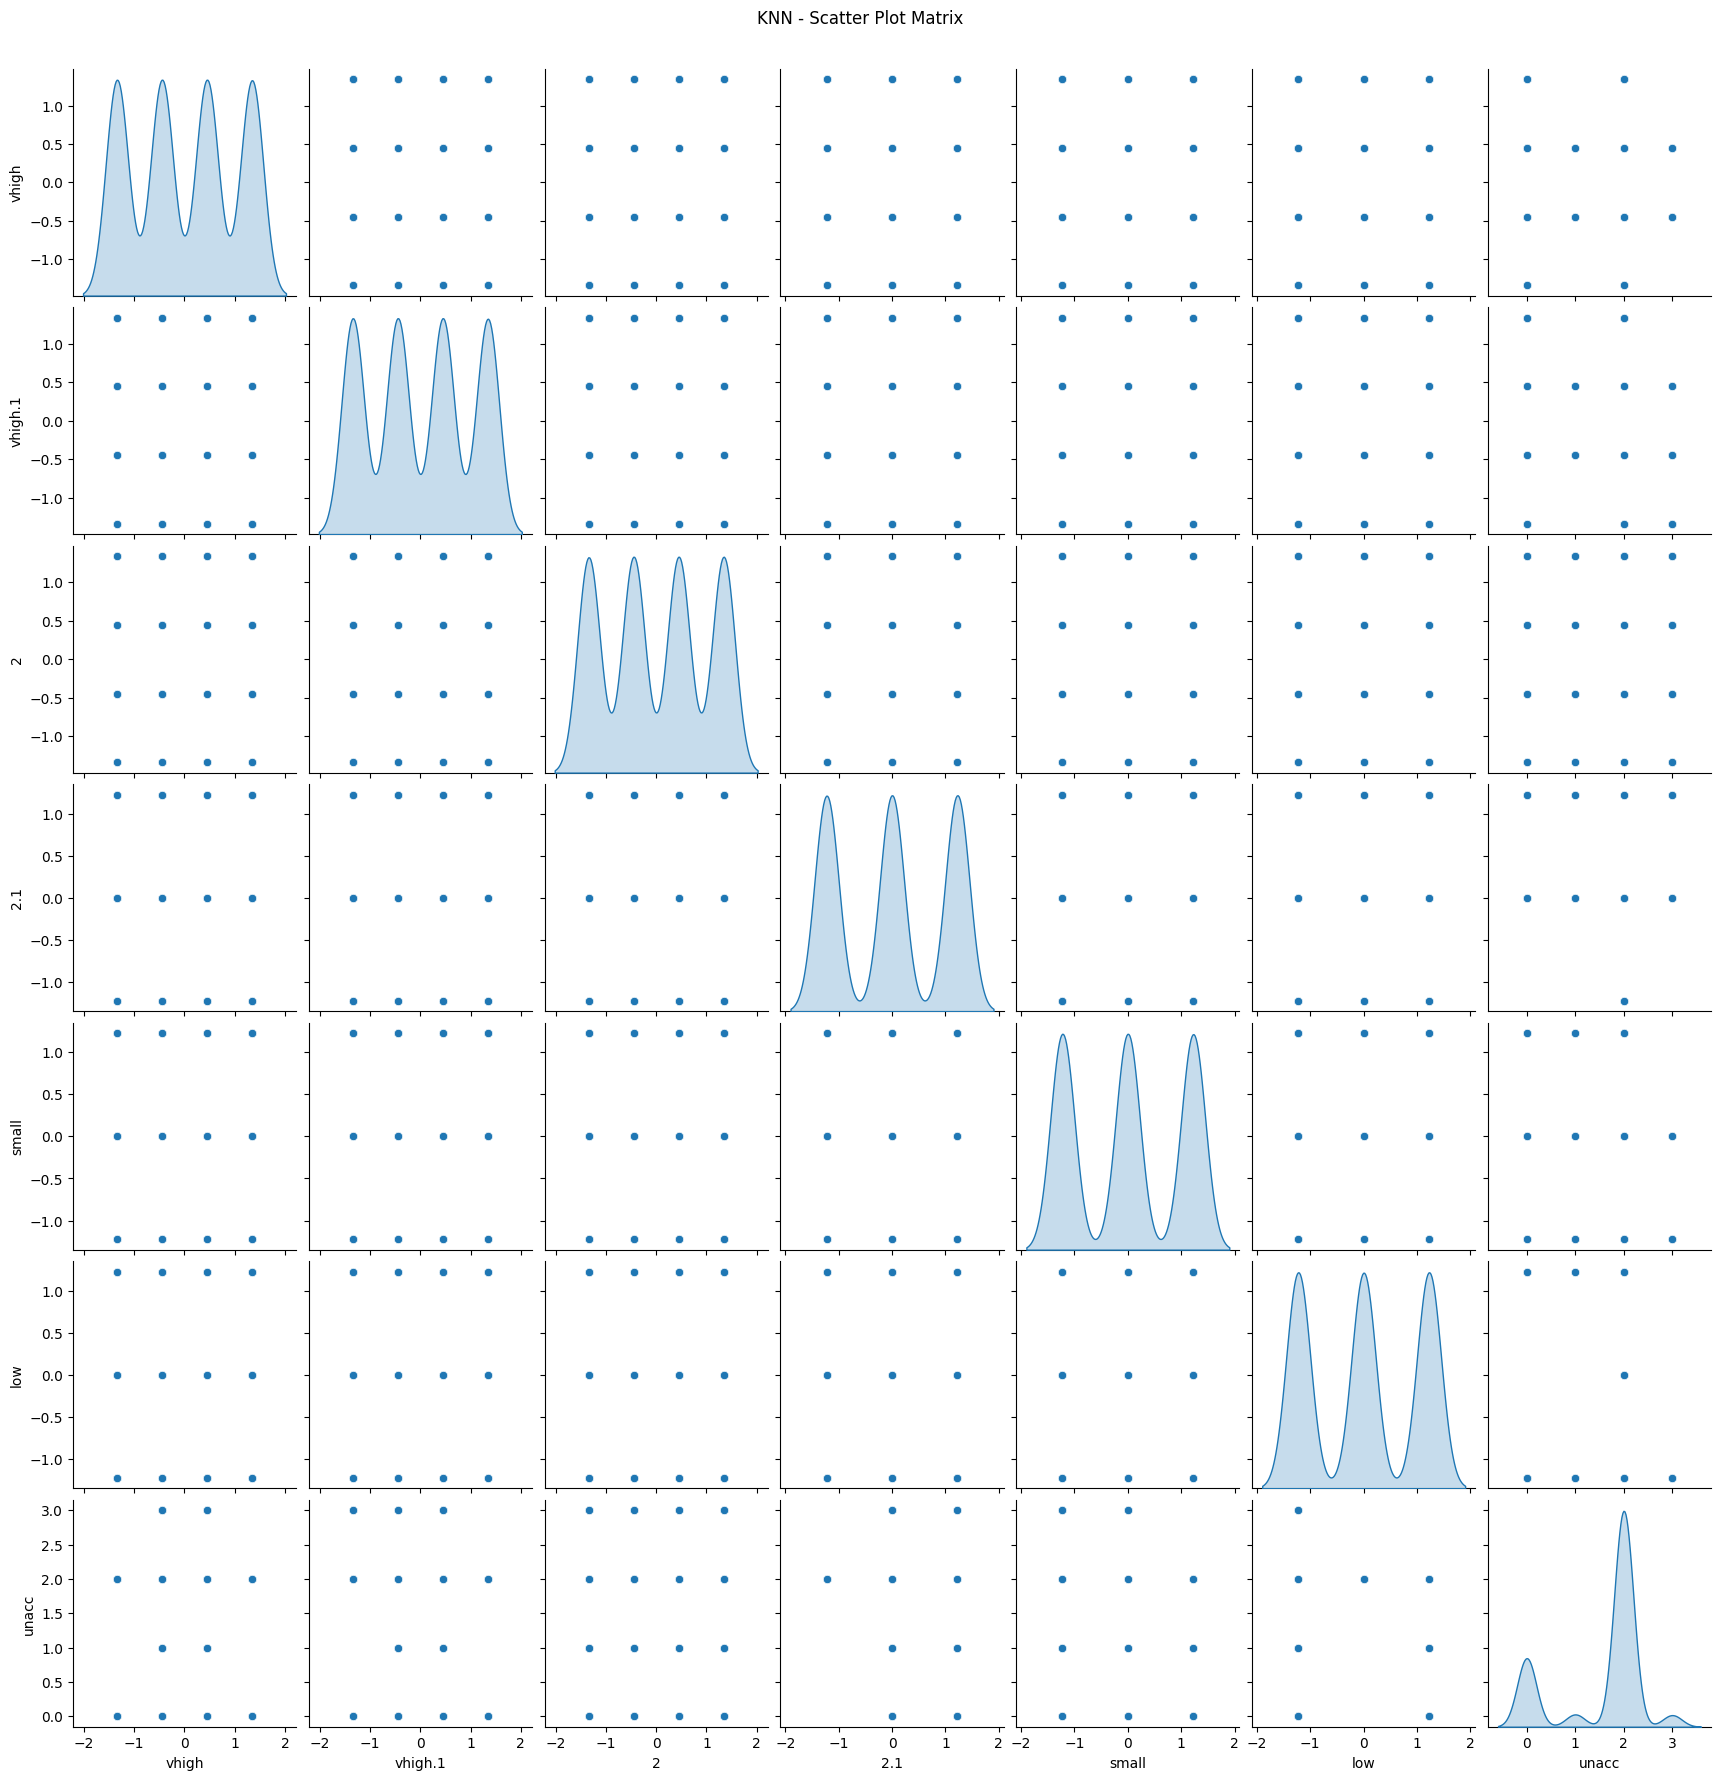

In [30]:
sns.pairplot(pd.concat([pd.DataFrame(X_scaled, columns=X.columns), y.reset_index(drop=True)], axis=1), diag_kind='kde')
plt.suptitle('KNN - Scatter Plot Matrix', y=1.02)
plt.show()

**ptimal K Value for KNN**

In [31]:
k_values = range(1, 20)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred_k = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred_k)
    accuracies.append(acc)

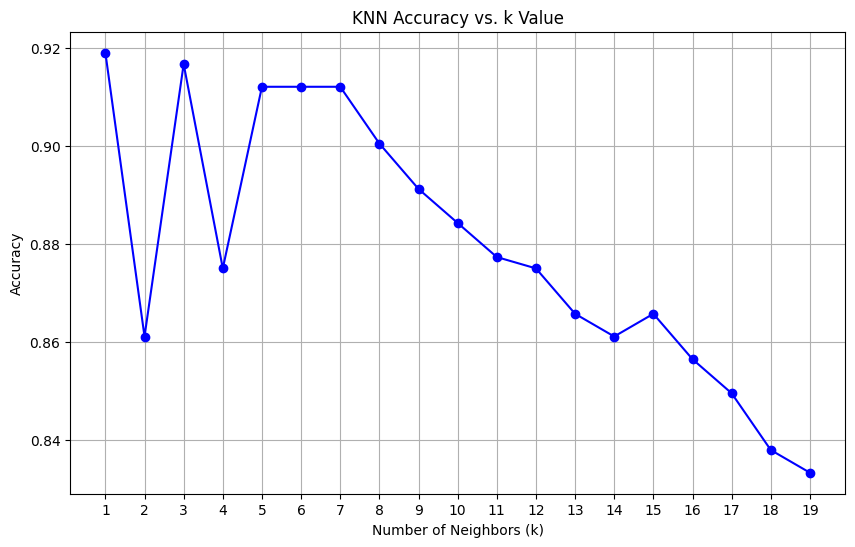

In [32]:
# Plotting k vs accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title('KNN Accuracy vs. k Value')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

**Performance Comparison**

In [37]:
# Performance comparison
dt_accuracy = accuracy_score(y_test, dt_pred)  # Changed from y_pred_dt
knn_accuracy = accuracy_score(y_test, y_pred_knn)

print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
print(f"KNN Accuracy: {knn_accuracy:.2f}")

dt_report = classification_report(y_test, dt_pred, output_dict=True)  # Changed from y_pred_dt
knn_report = classification_report(y_test, y_pred_knn, output_dict=True)

dt_f1 = dt_report['macro avg']['f1-score']
knn_f1 = knn_report['macro avg']['f1-score']

print("\nAlgorithm Comparison:")
print(f"{'Metric':<15}{'Decision Tree':<15}{'KNN':<15}")
print(f"{'Accuracy':<15}{dt_accuracy:<15.4f}{knn_accuracy:<15.4f}")
print(f"{'F1-score (macro)':<15}{dt_f1:<15.4f}{knn_f1:<15.4f}")

Decision Tree Accuracy: 0.98
KNN Accuracy: 0.91

Algorithm Comparison:
Metric         Decision Tree  KNN            
Accuracy       0.9792         0.9120         
F1-score (macro)0.9093         0.7041         


**Visualization of Algorithm Comparison**

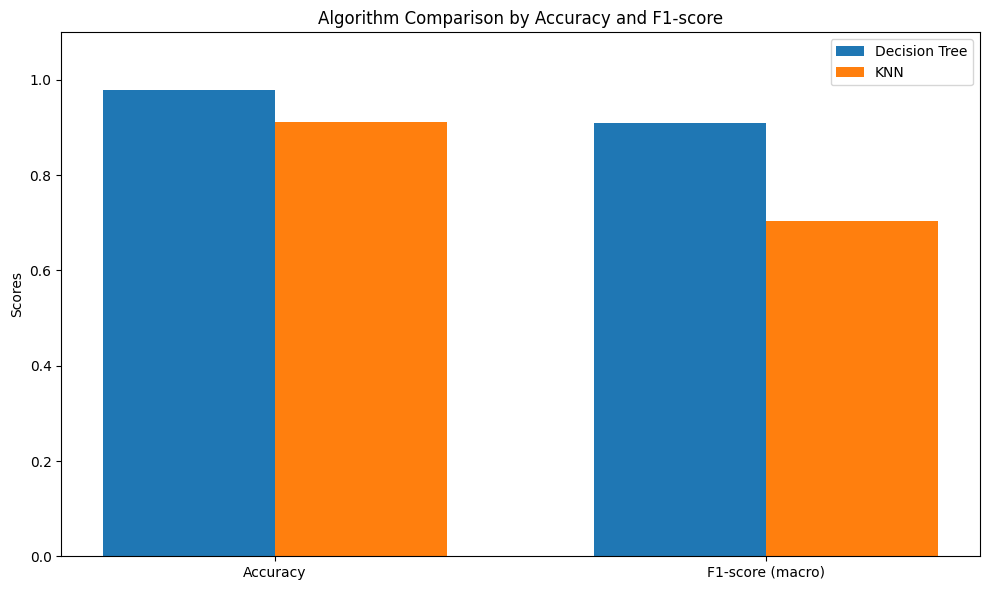

In [39]:
import numpy as np
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'F1-score (macro)']
dt_scores = [dt_accuracy, dt_f1]
knn_scores = [knn_accuracy, knn_f1]

x = np.arange(len(metrics))  # [0, 1]
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# Bar plots
rects1 = ax.bar(x - width/2, dt_scores, width, label='Decision Tree')
rects2 = ax.bar(x + width/2, knn_scores, width, label='KNN')

# Labels and formatting
ax.set_ylabel('Scores')
ax.set_title('Algorithm Comparison by Accuracy and F1-score')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)  # Ensure full score visibility
ax.legend()


fig.tight_layout()
plt.show()
